### Imports

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Read Data

In [149]:
txt_data = []
relative_path = os.path.join(os.getcwd(), 'data', 'AdienceBenchmarkGenderAndAgeClassification')

for file in os.listdir(relative_path):
    if file.endswith('.txt'):
       txt_data.append(pd.read_csv(os.path.join(relative_path, file), sep='\t'))

raw_data = pd.concat(txt_data, ignore_index=True)

In [150]:
#Create a absolute path to dataset which contains a imges for models
raw_data.loc[:, 'img_folder_path'] = raw_data.apply(lambda row: os.path.join(relative_path, 'faces', row.user_id), axis=1)
raw_data.loc[:, 'img_name'] = raw_data.apply(lambda row: 'coarse_tilt_aligned_face.' + str(row.face_id) + '.' + row.original_image, axis=1)
raw_data.loc[:, 'img_absolute_path'] = raw_data.apply(lambda row: os.path.join(row.img_folder_path, row.img_name), axis=1)

# Preprocessing dataset


In [151]:
#Check if data has missing values
raw_data.isnull().sum()

user_id                 0
original_image          0
face_id                 0
age                     0
gender                779
x                       0
y                       0
dx                      0
dy                      0
tilt_ang                0
fiducial_yaw_angle      0
fiducial_score          0
img_folder_path         0
img_name                0
img_absolute_path       0
dtype: int64

In [152]:
#Drop NA data from gender column
raw_data.dropna(subset=['gender'], inplace=True)

In [153]:
# f = female, m=male, u=unidetifie 
raw_data.gender.value_counts()

f    9372
m    8120
u    1099
Name: gender, dtype: int64

In [154]:
#Drop 'u' data from gender which stays as unindetyfie
raw_data = raw_data[raw_data.gender != 'u']

In [155]:
#Look at second column to predict - > age
raw_data.age.unique()

array(['(25, 32)', '(38, 43)', '(4, 6)', '(60, 100)', '(15, 20)',
       '(48, 53)', '(8, 12)', '(0, 2)', '(38, 48)', '35', '3', '55', '58',
       '22', '13', '45', '36', '23', '(38, 42)', 'None', '(8, 23)',
       '(27, 32)', '57', '2', '29', '34', '42', '46'], dtype=object)

In [156]:
raw_data = raw_data[raw_data.age != 'None']

In [157]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             17452 non-null  object
 1   original_image      17452 non-null  object
 2   face_id             17452 non-null  int64 
 3   age                 17452 non-null  object
 4   gender              17452 non-null  object
 5   x                   17452 non-null  int64 
 6   y                   17452 non-null  int64 
 7   dx                  17452 non-null  int64 
 8   dy                  17452 non-null  int64 
 9   tilt_ang            17452 non-null  int64 
 10  fiducial_yaw_angle  17452 non-null  int64 
 11  fiducial_score      17452 non-null  int64 
 12  img_folder_path     17452 non-null  object
 13  img_name            17452 non-null  object
 14  img_absolute_path   17452 non-null  object
dtypes: int64(8), object(7)
memory usage: 2.1+ MB


In [158]:
#Select data which will be needed to train and test models
data = raw_data[['age', 'gender', 'x', 'y', 'dx', 'dy', 'img_absolute_path']]

In [159]:
#Encode gender categorical data to numeric 
data = data.replace({'gender': {'f': 0, 'm': 1}})

In [160]:
#Encode age values
data.age.unique()

array(['(25, 32)', '(38, 43)', '(4, 6)', '(60, 100)', '(15, 20)',
       '(48, 53)', '(8, 12)', '(0, 2)', '(38, 48)', '35', '3', '55', '58',
       '22', '13', '45', '36', '23', '(38, 42)', '(8, 23)', '(27, 32)',
       '57', '2', '29', '34', '42', '46'], dtype=object)

In [161]:
age_mapping= [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), 
('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), 
('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), 
('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]

age_mapping_dict = {each[0]: each[1] for each in age_mapping}

In [162]:
#Encode categorical age data to numeric
age_dict =  {'0-2': 0, '4-6': 1, '8-13': 2, '15-20': 3, '25-32': 4, '38-43': 5, '48-53': 6, '60+': 7}
data.loc[:, 'age'] = data.apply(lambda row: age_dict[age_mapping_dict[row.age]], axis=1)

In [164]:
data

,age,gender,x,y,dx,dy,img_absolute_path
0,4,0,0,414,1086,1383,f:\Data_Science\5_Projects\gender_age_detectio...
1,4,1,301,105,640,641,f:\Data_Science\5_Projects\gender_age_detectio...
2,4,0,2395,876,771,771,f:\Data_Science\5_Projects\gender_age_detectio...
3,4,1,752,1255,484,485,f:\Data_Science\5_Projects\gender_age_detectio...
4,4,1,175,80,769,768,f:\Data_Science\5_Projects\gender_age_detectio...
...,...,...,...,...,...,...,...
19341,4,0,718,748,492,492,f:\Data_Science\5_Projects\gender_age_detectio...
19342,4,1,48,472,768,768,f:\Data_Science\5_Projects\gender_age_detectio...
19343,4,0,950,0,692,687,f:\Data_Science\5_Projects\gender_age_detectio...
19344,4,0,831,895,899,899,f:\Data_Science\5_Projects\gender_age_detectio...


# Train Test Split

In [ ]:
from PIL import Image

def change_img(img_path):
    return np.array(Image.open(img_path)).resize((256,256))


In [165]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_gender = data['img_absolute_path']
y_gender = data['gender']

X_train_gender, X_test_gender, y_train_gedner, y_test_gender = train_test_split(X_gender, y_gender, test_size=0.3, random_state=42)

In [180]:
train_images = []
test_images = []

for img_path in X_train_gender:
    img change_img(img_path)
    
    break

f:\Data_Science\5_Projects\gender_age_detection\data\AdienceBenchmarkGenderAndAgeClassification\faces\114841417@N06\coarse_tilt_aligned_face.508.12059810674_3544d013d3_o.jpg


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, LayerNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

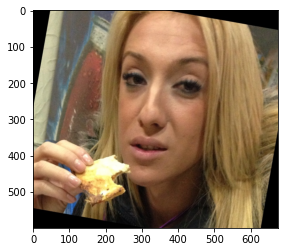

In [168]:
img_name = 'coarse_tilt_aligned_face.' + str(raw_data.face_id.loc[5]) + '.' + raw_data.original_image.loc[5]
img_path = os.path.join(relative_path, 'faces', raw_data.user_id.iloc[5], img_name)
img = load_img(img_path)
plt.imshow(img)
plt.show()

In [177]:
X_train_gender

5009     f:\Data_Science\5_Projects\gender_age_detectio...
15623    f:\Data_Science\5_Projects\gender_age_detectio...
3312     f:\Data_Science\5_Projects\gender_age_detectio...
17345    f:\Data_Science\5_Projects\gender_age_detectio...
5633     f:\Data_Science\5_Projects\gender_age_detectio...
                               ...                        
12676    f:\Data_Science\5_Projects\gender_age_detectio...
13395    f:\Data_Science\5_Projects\gender_age_detectio...
5879     f:\Data_Science\5_Projects\gender_age_detectio...
860      f:\Data_Science\5_Projects\gender_age_detectio...
17448    f:\Data_Science\5_Projects\gender_age_detectio...
Name: img_absolute_path, Length: 12216, dtype: object

In [178]:
y_train_gedner

5009     1
15623    0
3312     0
17345    1
5633     0
        ..
12676    1
13395    0
5879     0
860      0
17448    1
Name: gender, Length: 12216, dtype: int64